In [1]:
from cnmodel import cells
from cnmodel.util import sound

import matplotlib.pyplot as plt
import numpy as np

import random

--No graphics will be displayed.
[2424013] Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
[2424013] Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
[2424013] NumExpr defaulting to 16 threads.


In [2]:
stimpar = {
    "dur": 0.2,
    "pip": 0.04,
    "start": [0.1],
    "baseline": [50, 100],
    "response": [100, 140],
}

In [3]:
fmin = 4e3
fmax = 32e3
octavespacing = 1 / 8.0
# octavespacing = 1.
n_frequencies = int(np.log2(fmax / fmin) / octavespacing) + 1
fvals = (
    np.logspace(
        np.log2(fmin / 1000.0),
        np.log2(fmax / 1000.0),
        num=n_frequencies,
        endpoint=True,
        base=2,
    )
    * 1000.0
)
fvals

array([ 4000.        ,  4362.03093066,  4756.82846001,  5187.3582186 ,
        5656.85424949,  6168.84330163,  6727.17132203,  7336.03234564,
        8000.        ,  8724.06186132,  9513.65692002, 10374.71643721,
       11313.70849898, 12337.68660326, 13454.34264406, 14672.06469127,
       16000.        , 17448.12372264, 19027.31384004, 20749.43287442,
       22627.41699797, 24675.37320653, 26908.68528812, 29344.12938255,
       32000.        ])

In [4]:
# cf = 28e3

sgc_cells = []

for f in fvals:
    sgc_cells.append((f, cells.DummySGC(cf=f, sr=2)))  #, sr=sr)

In [5]:
f = 16e3
db = 80

stim = sound.TonePip(
    rate=100e3,
    duration=stimpar["dur"],
    f0=f,
    dbspl=db,  # dura 0.2, pip_start 0.1 pipdur 0.04
    ramp_duration=2.5e-3,
    pip_duration=stimpar["pip"],
    pip_start=stimpar["start"],
)

In [6]:
for _, sgc_cell in sgc_cells:
    sgc_cell.set_sound_stim(stim, seed=74, simulator='cochlea')

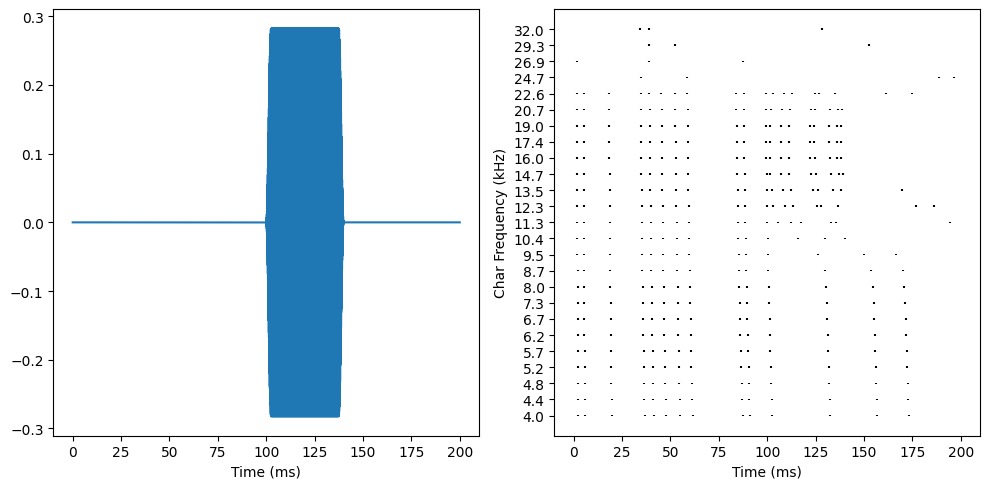

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs = axs.ravel()

axs[0].plot(stim.time*1000, stim.sound)

loss_frac = 0.8
loss_freq = 24e3

for i, (f, sgc_cell) in enumerate(sgc_cells):
    # spkt = sgc_cell._spiketrain
    if f >= loss_freq:
        ind_remove = set(random.sample(list(range(len(sgc_cell._spiketrain))), int(loss_frac*len(sgc_cell._spiketrain))))
        sgc_cell._spiketrain = [n for i, n in enumerate(sgc_cell._spiketrain) if i not in ind_remove]

    axs[1].vlines(sgc_cell._spiketrain, ymin=i-0.05, ymax=i+0.05, color='k')

axs[1].set_yticks(range(len(sgc_cells)))
axs[1].set_yticklabels(np.round(fvals/1000,1))
axs[1].set_ylabel('Char Frequency (kHz)')
    
for ax in axs:
    ax.set_xlim([-10,210])
    ax.set_xlabel('Time (ms)')

fig.tight_layout()